In [1]:
#  Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Load dataset
data = pd.read_csv("Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
#  Display first few rows to understand data
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
#  Check for missing values
print("Missing values in each column:\n", data.isnull().sum().sum())

Missing values in each column:
 0


Number of duplicate records: 0


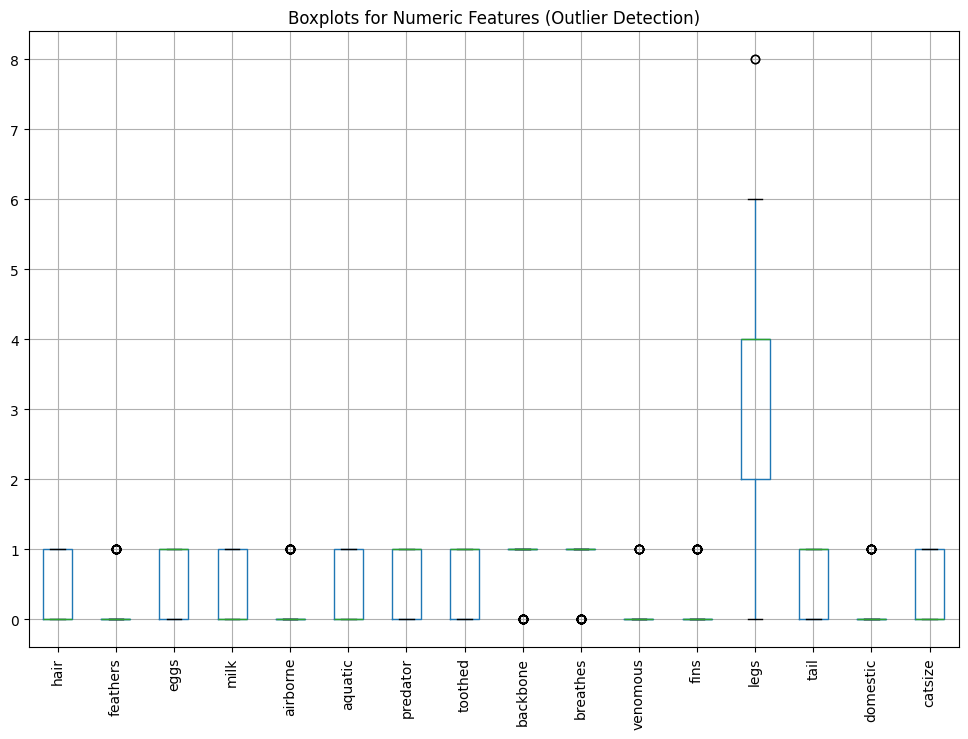

In [7]:
#  Identify duplicate rows and inspect numerical features for outliers
print(f"Number of duplicate records: {data.duplicated().sum()}")
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
if 'type' in numeric_features:
    numeric_features.remove('type')

plt.figure(figsize=(12, 8))
data[numeric_features].boxplot(rot=90)
plt.title("Boxplots for Numeric Features (Outlier Detection)")
plt.show()

In [8]:
#  Display column names
print(data.columns)


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


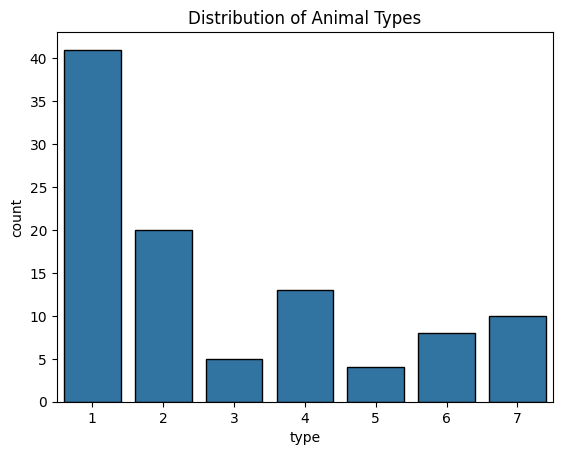

In [12]:
#  Class distribution visualization
sns.countplot(x='type', data=data, edgecolor='black')
plt.title("Distribution of Animal Types")
plt.show()

In [13]:
#  Prepare input features and target variable
features = data.drop(["animal name", "type"], axis=1)
labels = data["type"]


In [14]:
# scale numeric values since KNN is distance-based
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled


array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [15]:
#  Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, labels, test_size=0.2, random_state=42, stratify=labels
)

In [16]:
#  Find best K value by testing multiple K values
scores = []
for k in range(1, 16, 2):  # test odd K values from 1 to 15
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    scores.append((k, acc))

best_k = max(scores, key=lambda x: x[1])
print(f"Best K value based on accuracy: {best_k[0]} with accuracy {best_k[1]:.3f}")

Best K value based on accuracy: 1 with accuracy 1.000


In [17]:
#  Train final KNN model using best K
knn_model = KNeighborsClassifier(n_neighbors=best_k[0], metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred

array([5, 2, 4, 2, 1, 1, 4, 6, 1, 4, 7, 1, 1, 7, 1, 2, 3, 6, 1, 1, 2])

In [18]:
#  Model performance evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]
Accuracy: 1.0
Precision (macro): 1.0
Recall (macro): 1.0
F1-score (macro): 1.0


In [19]:
#  Visualizing decision boundaries using PCA (2D projection)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

In [20]:
#  Split PCA-transformed features for visualization
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    features_pca, labels, test_size=0.2, random_state=42, stratify=labels
)

In [21]:
#  Train KNN on 2D PCA space
knn_vis = KNeighborsClassifier(n_neighbors=best_k[0])
knn_vis.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(n_neighbors=1)

In [22]:
#  Generate mesh grid for decision boundary plotting
h = 0.1
x_min, x_max = features_pca[:, 0].min() - 1, features_pca[:, 0].max() + 1
y_min, y_max = features_pca[:, 1].min() - 1, features_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

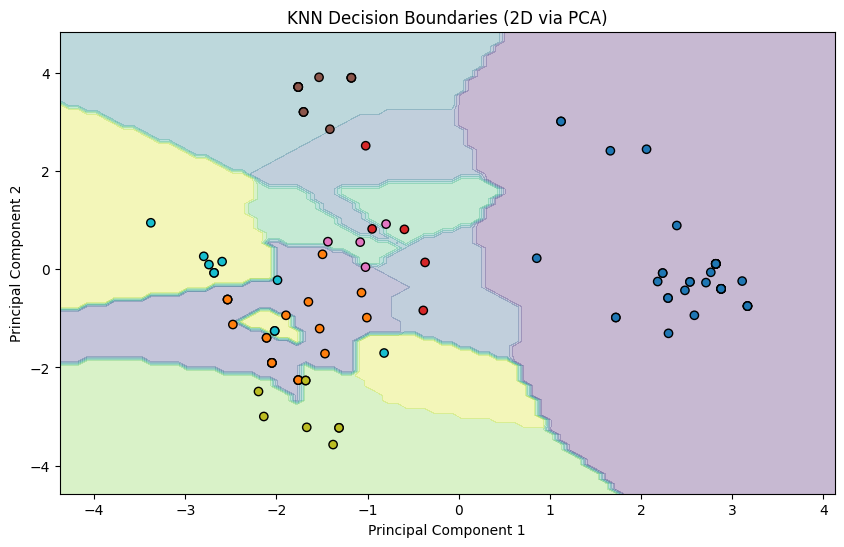

In [23]:
#  Plot decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, edgecolor='k', cmap=plt.cm.tab10)
plt.title("KNN Decision Boundaries (2D via PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


##Interview Questions

# 1. What are the main hyperparameters in the K-Nearest Neighbors algorithm?
    - n_neighbors, weights, metric, p, algorithm, leaf_size

# 2. What are the common distance metrics used in KNN?
    - Euclidean, Manhattan, Minkowski, Chebyshev, Hamming, Mahalanobis
